In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# looking at what data we have
!ls ./data

Accidents0514.csv   Road-Accident-Safety-Data-Guide.xls
Casualties0514.csv  Vehicles0514.csv


In [3]:
# create dataframes
casualties_df = pd.read_csv('data/Casualties0514.csv', low_memory=False)
accidents_df = pd.read_csv('data/Accidents0514.csv', low_memory=False)
vehicles_df = pd.read_csv('data/Vehicles0514.csv', low_memory=False)

In [4]:
casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [5]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Accident_Index                    object
 1   Vehicle_Reference                 int64 
 2   Vehicle_Type                      int64 
 3   Towing_and_Articulation           int64 
 4   Vehicle_Manoeuvre                 int64 
 5   Vehicle_Location-Restricted_Lane  int64 
 6   Junction_Location                 int64 
 7   Skidding_and_Overturning          int64 
 8   Hit_Object_in_Carriageway         int64 
 9   Vehicle_Leaving_Carriageway       int64 
 10  Hit_Object_off_Carriageway        int64 
 11  1st_Point_of_Impact               int64 
 12  Was_Vehicle_Left_Hand_Drive?      int64 
 13  Journey_Purpose_of_Driver         int64 
 14  Sex_of_Driver                     int64 
 15  Age_of_Driver                     int64 
 16  Age_Band_of_Driver                int64 
 17  Engine_C

In [6]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1640597 non-null  object 
 1   Location_Easting_OSGR                        1640486 non-null  float64
 2   Location_Northing_OSGR                       1640486 non-null  float64
 3   Longitude                                    1640486 non-null  float64
 4   Latitude                                     1640486 non-null  float64
 5   Police_Force                                 1640597 non-null  int64  
 6   Accident_Severity                            1640597 non-null  int64  
 7   Number_of_Vehicles                           1640597 non-null  int64  
 8   Number_of_Casualties                         1640597 non-null  int64  
 9   Date                                         1

# Preprocessing

In [7]:
def drop_nulls(df, cols=[]):
    for col in cols:
        if df[col].min() == -1:
            df = df[df[col] != -1]
    return df

In [8]:
for col in ["Sex_of_Driver", "Age_of_Driver", "Age_of_Vehicle"]:
    print(col, vehicles_df[col].value_counts()[-1])

Sex_of_Driver 33
Age_of_Driver 330608
Age_of_Vehicle 874989


In [9]:
v_cols_to_drop = ["Sex_of_Driver", "Age_of_Driver"]
pre_drop_size = len(vehicles_df)
print("Pre-drop size of vehicles_df:", pre_drop_size)
print("Dropping nulls from", v_cols_to_drop)
vehicles_df = drop_nulls(vehicles_df, v_cols_to_drop)
print("Post-drop size of vehicles_df:", len(vehicles_df))
print(pre_drop_size - len(vehicles_df), "rows dropped.")

Pre-drop size of vehicles_df: 3004425
Dropping nulls from ['Sex_of_Driver', 'Age_of_Driver']
Post-drop size of vehicles_df: 2673814
330611 rows dropped.


In [10]:
v_cols_to_drop = ["Sex_of_Casualty", "Age_of_Casualty", "Casualty_Severity"]
pre_drop_size = len(casualties_df)
print("Pre-drop size of casualties_df:", pre_drop_size)
print("Dropping nulls from", v_cols_to_drop)
casualties_df = drop_nulls(casualties_df, v_cols_to_drop)
print("Post-drop size of casualties_df:", len(casualties_df))
print(pre_drop_size - len(casualties_df), "rows dropped.")

Pre-drop size of casualties_df: 2216720
Dropping nulls from ['Sex_of_Casualty', 'Age_of_Casualty', 'Casualty_Severity']
Post-drop size of casualties_df: 2170554
46166 rows dropped.


In [11]:
v_cols_to_drop = ["Accident_Severity", "Weather_Conditions", "Road_Surface_Conditions", "Light_Conditions"]
pre_drop_size = len(accidents_df)
print("Pre-drop size of accidents_df:", pre_drop_size)
print("Dropping nulls from", v_cols_to_drop)
accidents_df = drop_nulls(accidents_df, v_cols_to_drop)
print("Post-drop size of accidents_df:", len(accidents_df))
print(pre_drop_size - len(accidents_df), "rows dropped.")

Pre-drop size of accidents_df: 1640597
Dropping nulls from ['Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']
Post-drop size of accidents_df: 1638295
2302 rows dropped.


# Data Analysis

### Geographic plotting

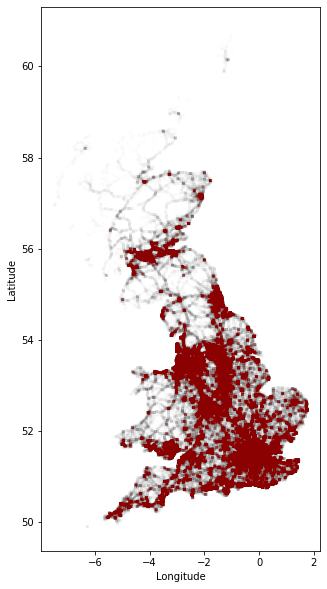

In [12]:
fig, ax = plt.subplots(figsize=(5,10))
sns.scatterplot(ax=ax, data=accidents_df, x='Longitude', y='Latitude', alpha=0.005, color='darkred', marker=".")
plt.savefig('accidents_long_lat_small.png', dpi=200, bbox_inches="tight")

### Sex of Driver/Casualties

In [13]:
def num_to_sex(n):
    if type(n) is not int:
        return n
    if n == 1:
        return "Male"
    elif n == 2:
        return "Female"
    else:
        return "Other"

In [14]:
vehicles_df["Sex_of_Driver"].describe()

count    2.673814e+06
mean     1.314093e+00
std      4.737493e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: Sex_of_Driver, dtype: float64

In [15]:
vehicles_df["Sex_of_Driver"].describe()

count    2.673814e+06
mean     1.314093e+00
std      4.737493e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: Sex_of_Driver, dtype: float64

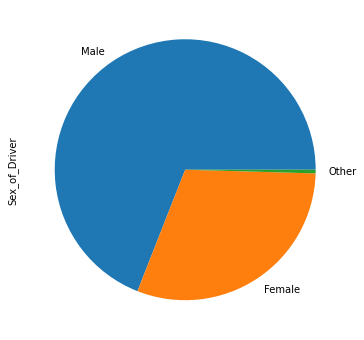

In [16]:
vehicles_df["Sex_of_Driver"] = vehicles_df["Sex_of_Driver"].apply(lambda s: num_to_sex(s))
vehicles_df["Sex_of_Driver"].value_counts().plot.pie(y="Sex of Driver", figsize=(11,6))
plt.savefig('sex_of_driver.png', dpi=200, bbox_inches="tight")

In [17]:
vehicles_df["Sex_of_Driver"].value_counts()

Male      1846021
Female     815761
Other       12032
Name: Sex_of_Driver, dtype: int64

In [18]:
vehicles_df["Sex_of_Driver"].value_counts()['Male'] / (vehicles_df["Sex_of_Driver"].value_counts()['Female'] + vehicles_df["Sex_of_Driver"].value_counts()['Other'])

2.2300514742212125

In [19]:
casualties_df["Sex_of_Casualty"].describe()

count    2.170554e+06
mean     1.416693e+00
std      4.930112e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: Sex_of_Casualty, dtype: float64

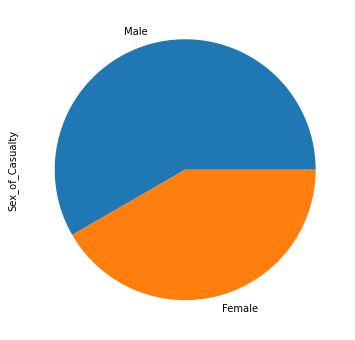

In [20]:
casualties_df["Sex_of_Casualty"] = casualties_df["Sex_of_Casualty"].apply(lambda s: num_to_sex(s))
casualties_df["Sex_of_Casualty"].value_counts().plot.pie(y="Sex_of_Casualty", figsize=(11,6))
plt.savefig('sex_of_casualty.png', dpi=200, bbox_inches="tight")

In [21]:
casualties_df["Sex_of_Casualty"].value_counts()['Male'] / casualties_df["Sex_of_Casualty"].value_counts()['Female']

1.3998500752940448

## Vehicles : Casualties

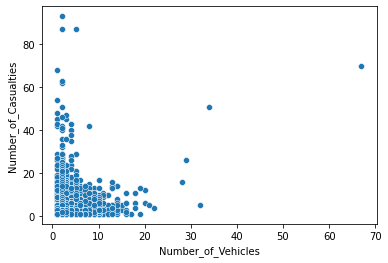

In [22]:
sns.scatterplot(x="Number_of_Vehicles", y="Number_of_Casualties", data=accidents_df)
plt.savefig('vehicles_casualties.png', bbox_inches="tight", dpi=200)

In [23]:
vehicles_df[["Vehicle_Type", "Accident_Index"]]

,Vehicle_Type,Accident_Index
0,9,200501BS00001
1,11,200501BS00002
2,11,200501BS00003
3,9,200501BS00003
4,9,200501BS00004
...,...,...
3004420,9,2014984138414
3004421,19,2014984138414
3004422,9,2014984138414
3004423,11,2014984139614


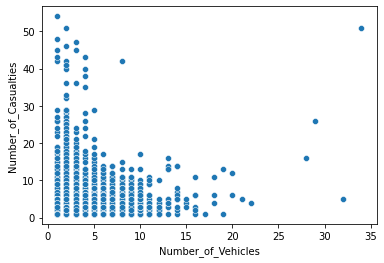

In [24]:
veh_ca = accidents_df[["Number_of_Vehicles", "Number_of_Casualties"]]
veh_ca = veh_ca[veh_ca['Number_of_Vehicles'] < 60]
veh_ca = veh_ca[veh_ca['Number_of_Casualties'] < 60]

sns.scatterplot(x="Number_of_Vehicles", y="Number_of_Casualties", data=veh_ca)
plt.savefig('vehicles_casualties_no_outliers.png', bbox_inches="tight", dpi=200)

## Time x Accident Severity

In [25]:
def time_to_int(time_str):
    if type(time_str) is not str: return time_str
    t = time_str.split(':')
    return int(t[0]) * 100 + int(t[1])

In [26]:
def severity_strings(s):
    lookup = {1: "Fatal", 2: "Serious", 3: "Slight"}
    if type(s) is not int:
        return s
    else:
        return lookup[s]

In [27]:
def week_strings(s):
    lookup = {1:"Sun", 2:"Mon", 3:"Tue", 4:"Wed", 5:"Thu", 6:"Fri", 7:"Sat"}
    if type(s) is not int:
        return s
    else:
        return lookup[s]

In [28]:
accidents_df['Time'] = accidents_df['Time'].dropna().apply(time_to_int)
accidents_df['Accident_Severity'] = accidents_df['Accident_Severity'].apply(severity_strings)
accidents_df['Day_of_Week'] = accidents_df['Day_of_Week'].apply(week_strings)

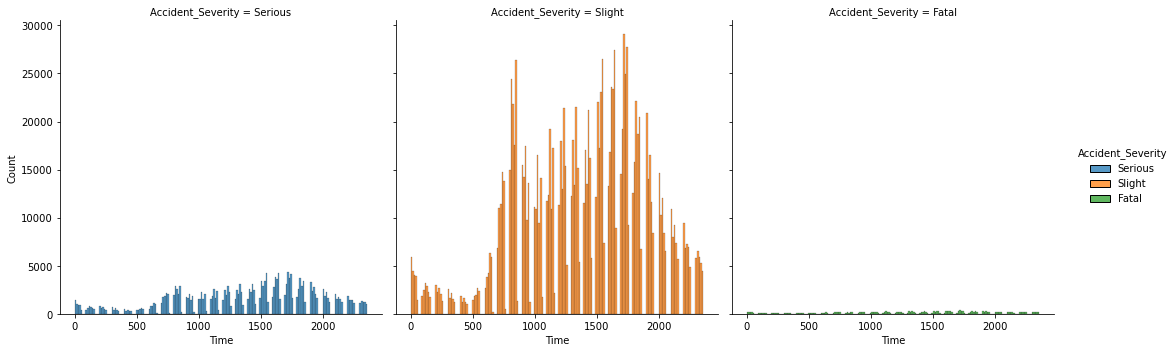

In [29]:
sns.displot(data=accidents_df, x="Time", hue="Accident_Severity", col="Accident_Severity")
plt.savefig('accidents_time.png', bbox_inches="tight", dpi=200)

In [30]:
accidents_df['Day_of_Week']

0          Tue
1          Wed
2          Thu
3          Fri
4          Mon
          ... 
1640592    Sun
1640593    Thu
1640594    Tue
1640595    Wed
1640596    Wed
Name: Day_of_Week, Length: 1638295, dtype: object

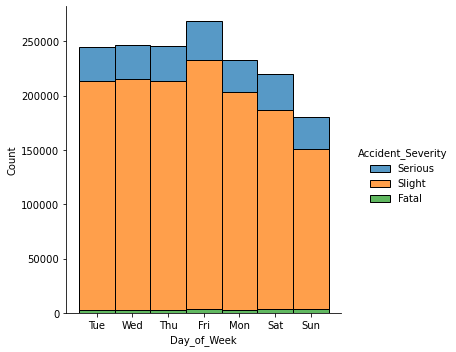

In [36]:
sns.displot(data=accidents_df, x="Day_of_Week", hue="Accident_Severity", multiple="stack")
plt.savefig('accidents_week.png', bbox_inches="tight", dpi=200)

In [32]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638295 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1638295 non-null  object 
 1   Location_Easting_OSGR                        1638185 non-null  float64
 2   Location_Northing_OSGR                       1638185 non-null  float64
 3   Longitude                                    1638185 non-null  float64
 4   Latitude                                     1638185 non-null  float64
 5   Police_Force                                 1638295 non-null  int64  
 6   Accident_Severity                            1638295 non-null  object 
 7   Number_of_Vehicles                           1638295 non-null  int64  
 8   Number_of_Casualties                         1638295 non-null  int64  
 9   Date                                         1

## Weather and Lighting


In [90]:
def weather_conv_rain(s):
    w = []
    if s == 1 or s == 4:
        w.append("Fine")
    elif s == 2 or s == 5:
        w.append("Raining")
    elif s == 4 or s == 6:
        w.append("Snowing")
    elif s == 7:
        w.append("Fog")
    else: w.append("Other")
    
    if s < 4 and s > 0:
        w.append("No winds")
    elif s > 4 and s < 8:
        w.append("High winds")
    else:
        w.append("Other")
        
    return w[0]

In [88]:
def weather_conv_wind(s):
    w = []
    if s == 1 or s == 4:
        w.append("Fine")
    elif s == 2 or s == 5:
        w.append("Raining")
    elif s == 4 or s == 6:
        w.append("Snowing")
    elif s == 7:
        w.append("Fog")
    else: w.append("Other")
    
    if s < 4 and s > 0:
        w.append("No winds")
    elif s > 4 and s < 8:
        w.append("High winds")
    else:
        w.append("Other")
        
    return w[1]

In [75]:
def lighting_conv(s):
    if type(s) is not int:
        return s
    if s == 1:
        return "Daylight"
    elif s == 4 or s == 5 or s == 6 or s == 7:
        return "Darkness"
    else:
        return "Other"

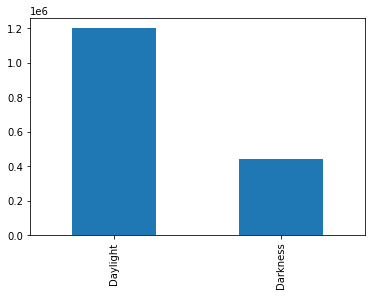

In [117]:
accidents_df['Light_Conditions'].apply(lighting_conv).value_counts().plot.bar()
plt.savefig('light.png', bbox_inches="tight", dpi=200)

In [83]:
accidents_df['Light_Conditions'].apply(lighting_conv).value_counts()['Daylight'] / accidents_df['Light_Conditions'].apply(lighting_conv).value_counts()['Darkness']

2.7395201585015396

In [95]:
r = accidents_df['Weather_Conditions'].apply(weather_conv_rain)
w = accidents_df['Weather_Conditions'].apply(weather_conv_wind)

In [100]:
wl = pd.DataFrame()
wl['Rain'] = r
wl['Wind'] = w

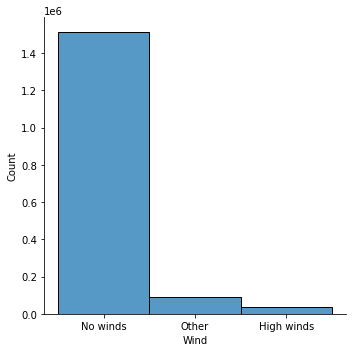

In [114]:
sns.displot(wl['Wind'])
plt.savefig('wind.png', bbox_inches="tight", dpi=200)

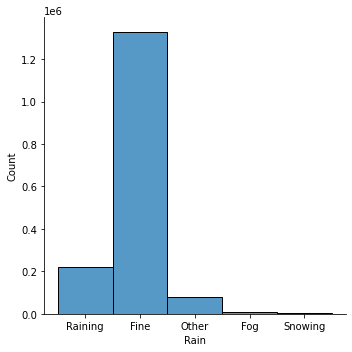

In [115]:
sns.displot(wl['Rain'])
plt.savefig('rain.png', bbox_inches="tight", dpi=200)

## Road type

In [122]:
def road_type_conv(s):
    lookup = {
        1: "Roundabout",
        2: "One way",
        3: "Dual carriageway",
        6: "Single carriageway",
        7: "Slip road"
    }
    if s not in lookup:
        return "Other"
    else:
        return lookup[s]

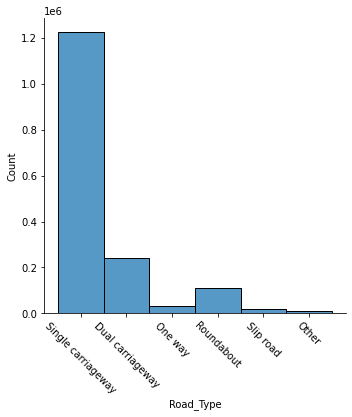

In [129]:
sns.displot(accidents_df['Road_Type'].apply(road_type_conv))
plt.xticks(rotation=-45)
plt.savefig('road.png', bbox_inches="tight", dpi=200)